# Week 7 - Linear classification

Learning contents:
* Least squares for classification
* Perceptron
* Logistic regression
* Extra: multi-class logistic regression

In [1]:
# Dependencies
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() # this import just makes the plots prettier
import numpy as np

## Data
We'll be working with a dataset of handwritten digits. 
Let visualise some examples.

In [2]:
# We're using a subset of two classes for now
digits = load_digits(n_class=2)

In [3]:
# Handy plotting functions
x_min, x_max = -40, 40
y_min, y_max = -40, 40

def plot_examples():
    show_num = 4
    _, axes = plt.subplots(1, show_num)
    images_and_labels = list(zip(digits.images, digits.target))
    for ax, (image, label) in zip(axes[:], images_and_labels[:show_num]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Label: %i' % label)

def plot_scatter(data, target, n_class=2):
    plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', n_class))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar();
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

def plot_decision_boundary(data, weights):
    raise NotImplementedError("You should fill this is")

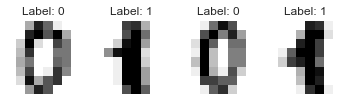

In [4]:
plot_examples()

In [5]:
# The dataset contains 2D data in the form of the `images` attribute, 
# as well as a 1D-version called `data`, where the images have been flattened. 
np.array_equal(digits.images[0].flatten(), digits.data[0])

True

In [6]:
# We can get a 2D version of the data using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data) # this is the representation, we'll be working with

In [7]:
# Out targets are in the set {0,1}
t_01 = digits.target

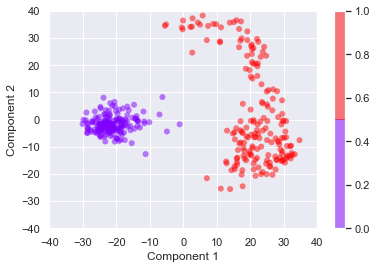

In [8]:
# Let's plot all the data in 2D
plot_scatter(X, t_01)

## 1) Least Squares

### 1.1) Find the weight vector using Least Squares for classification
Hint: Remember to augment the data with a column of 1's

### 1.2) Create class predictions using the weight vector
You should be able to correctly classify all data

### 1.3) Plot the decision boundary 
Hint: You can do this either by plotting a line on the boundary or creating a mesh of all predictions

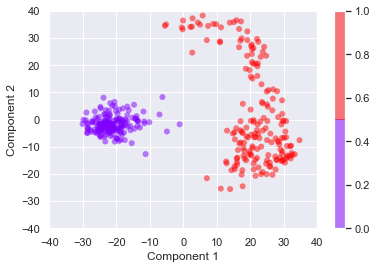

In [10]:
plot_scatter(X, t_01)
# plot_decision_boundary(X, W_least_squares)

## 2) Perceptron

A learning_rate of 0.1 should do the job.
Hint: remember to change the target representation range

### 2.2) Perform class-predictions
Again, you should be able to classify all correctly

### 2.3) Plot the decision boundary

## 3) Logistic Regression
### 3.1) Find the weight vector using the Logistic Regression

In [12]:
# initialise W_0 randomly
np.random.seed(42)
W_0 = 2 * np.random.random((1, 3)) -1 # random values in the range [-1,1]

# Our target vectors should be {0, 1}
t_01 = digits.target

### 3.2) Perform class-predictions

### 3.3) Plot the decision boundary

## 4) Multi-class logistic regression
Repeat 3) but now for multiple classes, i.e. compute the weight matrix, perform predictions (you shold be able to get about 93% accuracy) and plot decision boundaries.

Hint: You will need to use a one-hot encoding of the targets

In [13]:
# Data
n_class = 3
digits = load_digits(n_class=n_class)
pca = PCA(n_components=2)
X_mult = pca.fit_transform(digits.data)

learning_rate = 0.1

# We need to do a one_hot encoding of our data:
# I.e. 0 -> [1,0,0], 1 -> [0,1,0], 2 -> [0,0,1]
def one_hot(targets, n_class=n_class):
    res = np.eye(n_class)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[n_class])

t_oh = one_hot(digits.target, n_class)

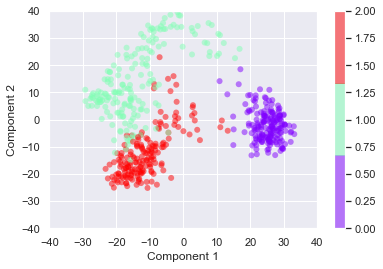

In [14]:
plot_scatter(X_mult, digits.target, n_class=n_class)

## 5) Multi-class logistic regression on original data representation
Repeat exercise 4), but use the original data representation instead.
You can omit the plots.

Hint: To get 100% accuracy, you can try to:
- Rescale your data to the range [0,1]
- Run 1000 epochs with learning_rate = 0.1